# Convex Hull
#### 2D - Graham Scan

In [1]:
# imports

import random
import matplotlib.pyplot as plt
import math
import numpy as np


In [2]:
# generate random coordinates

def generateCoordinates(x_min : int, y_min : int, x_max : int, y_max : int, n : int) -> list[int]:
    plane : list[int] = [(random.randint(x_min,x_max+1),random.randint(y_min,y_max+1)) for _ in range(n)]
    return plane

In [3]:
def display_coordinates(coordinates):
    x = [coord[0] for coord in coordinates]
    y = [coord[1] for coord in coordinates]
    
    plt.scatter(x[0], y[0], color='red')  
    plt.scatter(x[1:], y[1:])  
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('2D Coordinates')
    plt.show()

def display_coordinates_WithLines(coordinates):
    x = [coord[0] for coord in coordinates]
    y = [coord[1] for coord in coordinates]
    
    plt.scatter(x[0], y[0], color='red')  
    plt.scatter(x[1:], y[1:])  
    
    for i in range(1, len(coordinates)):
        plt.plot([x[0], x[i]], [y[0], y[i]], color='black')
    
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('2D Coordinates')
    plt.show()

def plot_points_and_line(points1, points2):
    x1, y1 = zip(*points1)
    x2, y2 = zip(*points2)

    plt.scatter(x1[0], y1[0], color='red')
    plt.scatter(x1[1:], y1[1:])
    plt.plot(x2, y2, color='red')

    plt.show()




In [4]:
def sortByAngle(p):
    points = sorted(p, key=lambda x: (x[1],x[0]))
    print(points)
    display_coordinates(points)

    start = points[0]
    sortedByAngle = sorted(points, key = lambda point : math.atan2(point[1]-start[1], point[0]-start[0]))
    print(sortedByAngle)
    display_coordinates_WithLines(sortedByAngle)
    return points, sortedByAngle


In [5]:
def walkAround(points):
    npPoints = [np.array(x) for x in points]
    circumference = []
    for point in npPoints:
        while len(circumference) >= 2 and np.cross(circumference[-1] - circumference[-2], point - circumference[-1]) < 0:
            circumference.pop()
        circumference.append(point)
    circumference.append(points[0])
    print(circumference)
    return circumference

[(-6, -483), (82, -466), (-410, -465), (-262, -454), (-380, -452), (-48, -448), (268, -448), (-329, -403), (60, -374), (-85, -367), (111, -365), (56, -359), (131, -359), (67, -344), (330, -338), (-130, -326), (-6, -301), (-179, -292), (127, -290), (271, -243), (178, -236), (327, -233), (236, -197), (493, -190), (-309, -175), (104, -170), (497, -156), (205, -154), (-245, -145), (-24, -143), (-359, -137), (-479, -135), (-224, -112), (495, -110), (118, -92), (-387, -89), (-88, -86), (-453, -77), (-218, -70), (188, -70), (151, -31), (457, -31), (-270, -26), (-14, -22), (457, -2), (-178, 3), (193, 5), (318, 9), (-71, 19), (250, 20), (-268, 23), (-95, 24), (337, 45), (328, 47), (-445, 52), (332, 68), (-175, 79), (379, 94), (93, 97), (-474, 126), (-418, 139), (-339, 142), (477, 162), (479, 168), (111, 175), (-151, 176), (-127, 179), (-474, 204), (6, 226), (132, 255), (-53, 262), (-285, 286), (401, 288), (-271, 292), (-154, 292), (389, 298), (-195, 308), (-187, 309), (310, 321), (494, 324), (-

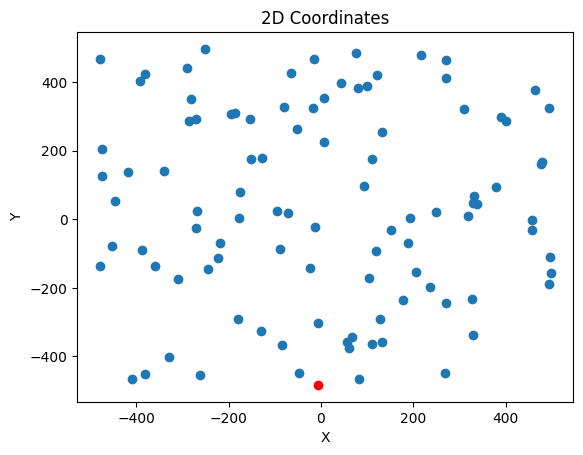

[(-6, -483), (268, -448), (82, -466), (330, -338), (493, -190), (497, -156), (495, -110), (327, -233), (271, -243), (131, -359), (457, -31), (111, -365), (457, -2), (236, -197), (477, 162), (479, 168), (178, -236), (127, -290), (379, 94), (318, 9), (337, 45), (205, -154), (328, 47), (494, 324), (332, 68), (60, -374), (464, 378), (401, 288), (67, -344), (250, 20), (389, 298), (56, -359), (188, -70), (193, 5), (310, 321), (104, -170), (151, -31), (118, -92), (271, 411), (270, 464), (217, 478), (132, 255), (111, 175), (93, 97), (122, 422), (99, 389), (80, 383), (75, 486), (43, 398), (6, 226), (6, 354), (-6, -301), (-16, 467), (-18, 325), (-14, -22), (-24, -143), (-53, 262), (-64, 428), (-79, 327), (-71, 19), (-95, 24), (-127, 179), (-154, 292), (-88, -86), (-151, 176), (-187, 309), (-195, 308), (-252, 497), (-175, 79), (-291, 440), (-282, 351), (-271, 292), (-178, 3), (-285, 286), (-382, 423), (-392, 404), (-479, 469), (-218, -70), (-268, 23), (-339, 142), (-270, -26), (-224, -112), (-418

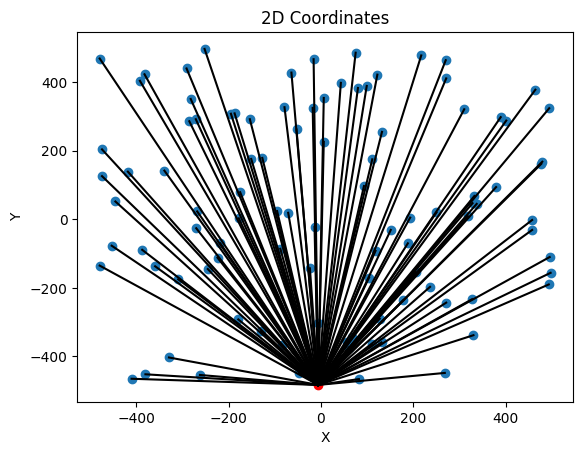

[array([  -6, -483]), array([ 268, -448]), array([ 493, -190]), array([ 497, -156]), array([494, 324]), array([464, 378]), array([270, 464]), array([217, 478]), array([ 75, 486]), array([-252,  497]), array([-479,  469]), array([-479, -135]), array([-410, -465]), (-6, -483)]


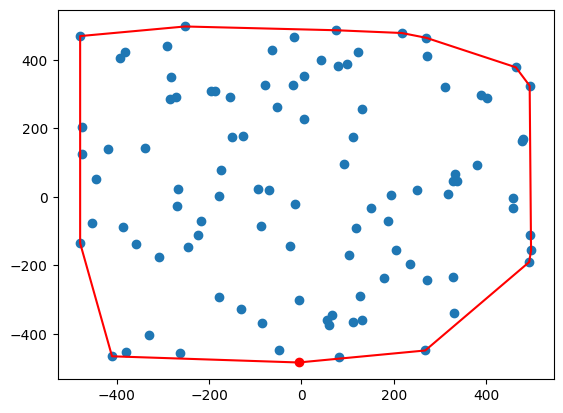

In [6]:
initialPoints = generateCoordinates(-500, -500, 500, 500, 100)
initialPoints, sortedPoints = sortByAngle(initialPoints)
boundary = walkAround(sortedPoints)
plot_points_and_line(initialPoints, boundary)
